# Multinomial distribution

https://en.wikipedia.org/wiki/Multinomial_distribution

[*********************100%***********************]  1 of 1 completed


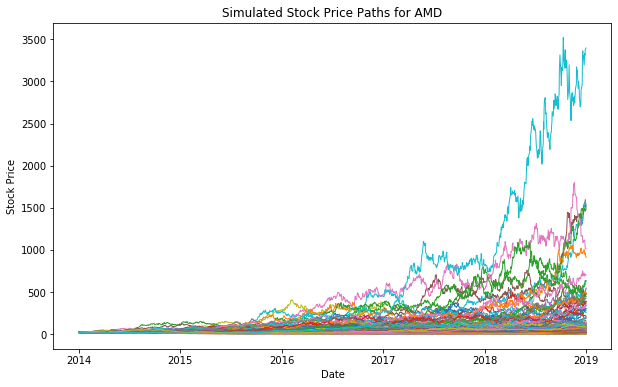

In [1]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input
symbol = 'AMD'
start = '2014-01-01'
end = '2019-01-01'

# Read data
dataset = yf.download(symbol, start, end)

# Prepare data
data = dataset['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Define the parameters for the GBM model
mu = daily_returns.mean()
sigma = daily_returns.std()

# Define the time period and number of simulations
T = len(data)
num_simulations = 100

# Simulate stock price using GBM
simulated_prices = np.zeros((T, num_simulations))
simulated_prices[0, :] = data.iloc[-1]  # Set initial prices

for t in range(1, T):
    z = np.random.normal(0, 1, num_simulations)
    simulated_prices[t, :] = simulated_prices[t - 1, :] * np.exp((mu - 0.5 * sigma**2) + sigma * z)

# Plot the simulated prices
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(data.index, simulated_prices[:, i], lw=1)

plt.title(f'Simulated Stock Price Paths for {symbol}')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()